# 1. Data Summarization


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('file.csv')

C:\Users\hp\AppData\Local\Temp\ipykernel_23260\4144944781.py:7: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('file.csv')


In [ ]:
print("Data Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData Types:")
print(df.dtypes)

Data Shape: (1000098, 52)

First 5 rows:
   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Cur

In [4]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate descriptive statistics
print("\nDescriptive Statistics for Numerical Features:")
print(df[numerical_cols].describe())

# Calculate variability measures specifically
variability_stats = df[numerical_cols].agg(['std', 'var', 'mean', 'median', 'min', 'max'])
print("\nVariability Statistics:")
print(variability_stats)


Descriptive Statistics for Numerical Features:
       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.98

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)



Variability Statistics:
        UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
std            6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
var            4.006094e+09  2.798451e+07  7.021728e+06  1.850635e+14   
mean           1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
median         9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
min            1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
max            3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

        RegistrationYear  Cylinders  cubiccapacity   kilowatts  NumberOfDoors  \
std             3.261391   0.294020     442.800640   19.393256       0.468314   
var            10.636674   0.086448  196072.407040  376.098365       0.219318   
mean         2010.225371   4.046642    2466.743258   97.207919       4.019250   
median       2011.000000   4.000000    2694.000000  111.000000       4.000000   
min          1987.000000   0.000000       0.000000    0.00

In [ ]:
print("Data Types Review:")
print(df.dtypes)

# Check categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(categorical_cols)

# Check date column
print("\nTransactionMonth sample:")
print(df['TransactionMonth'].head())


Data Types Review:
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOf

# 2. Data Quality Assessment

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


Missing Values:
Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64


# 3. Univariate Analysis


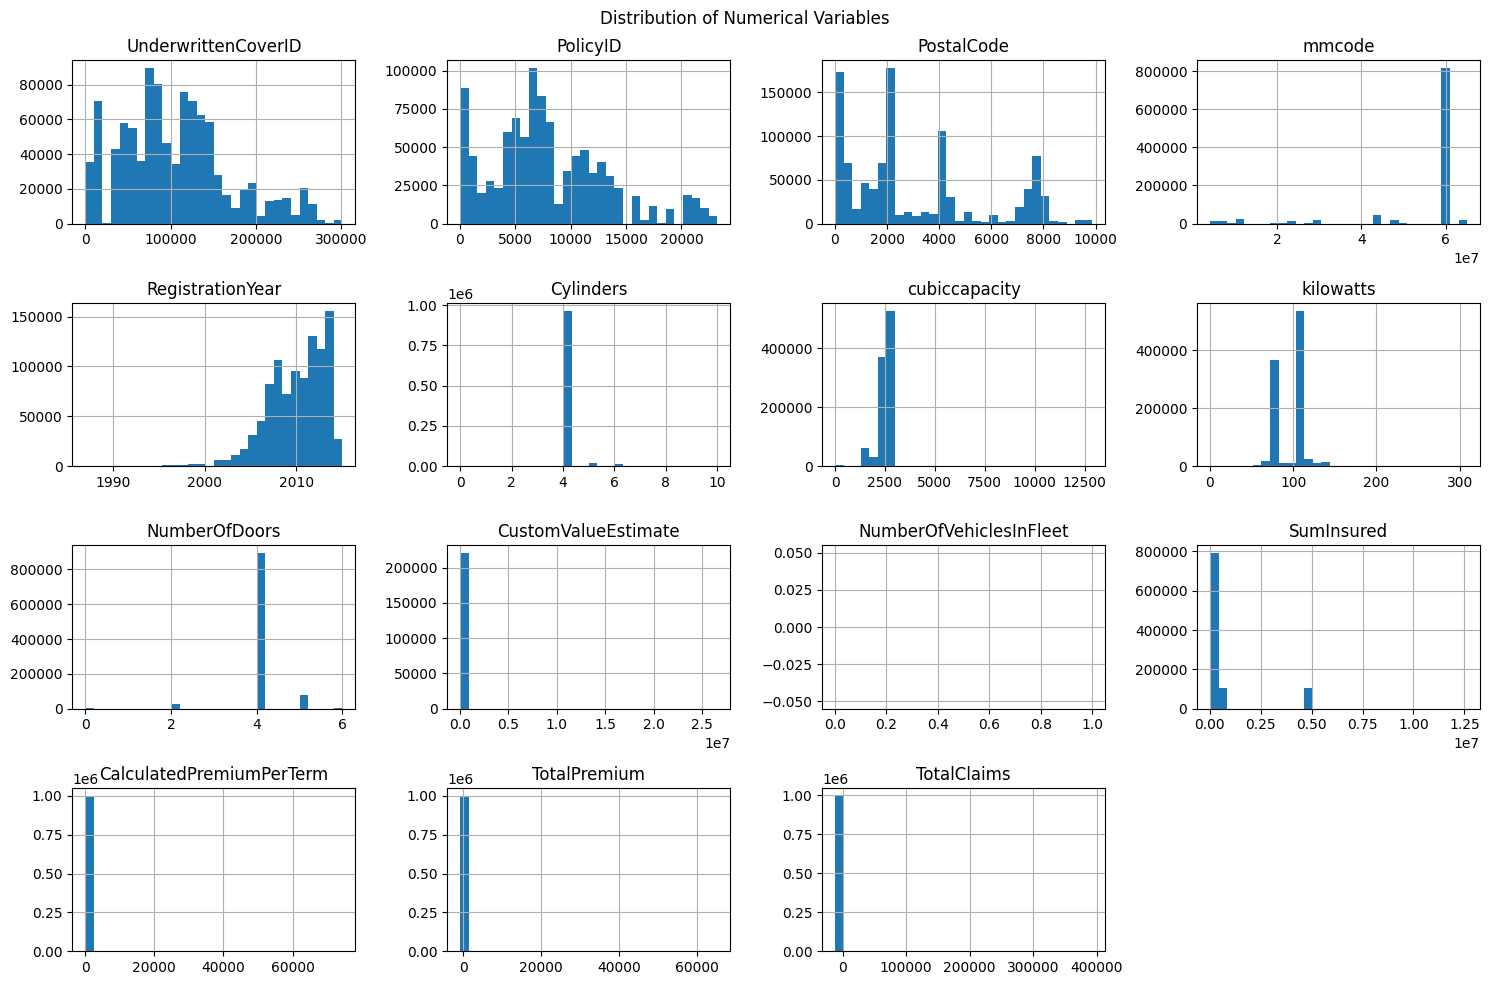

In [10]:
# Plot histograms for numerical columns
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Variables')
plt.tight_layout()
plt.show()

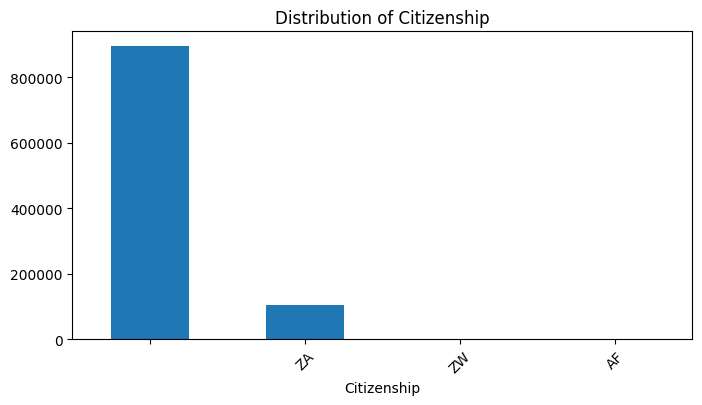

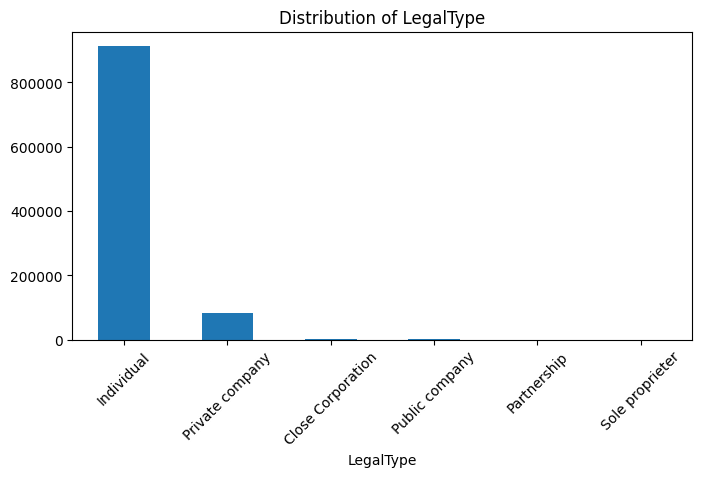

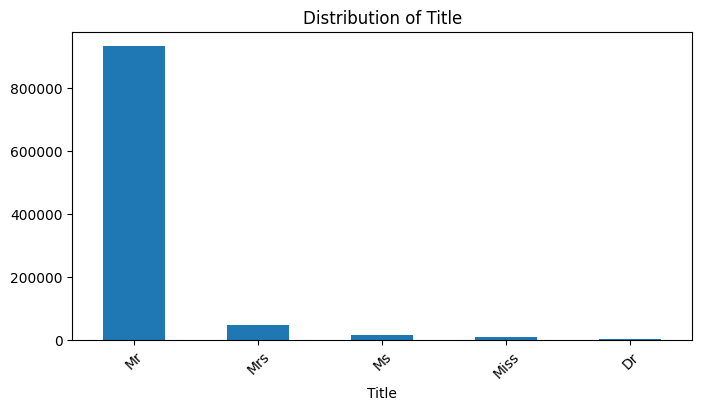

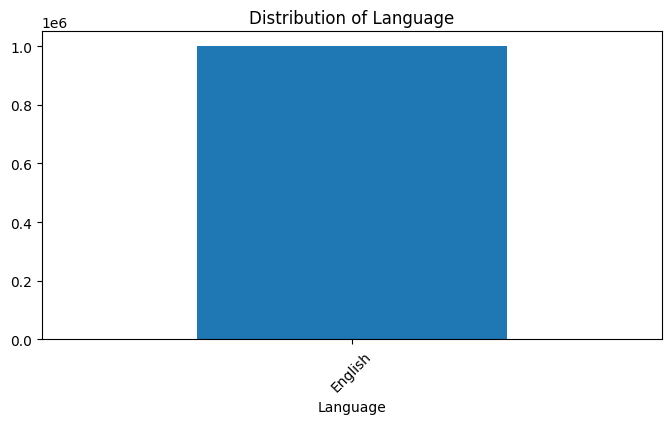

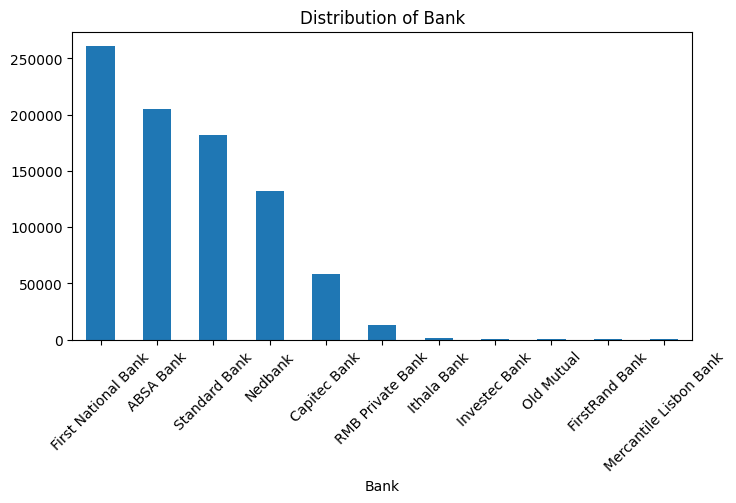

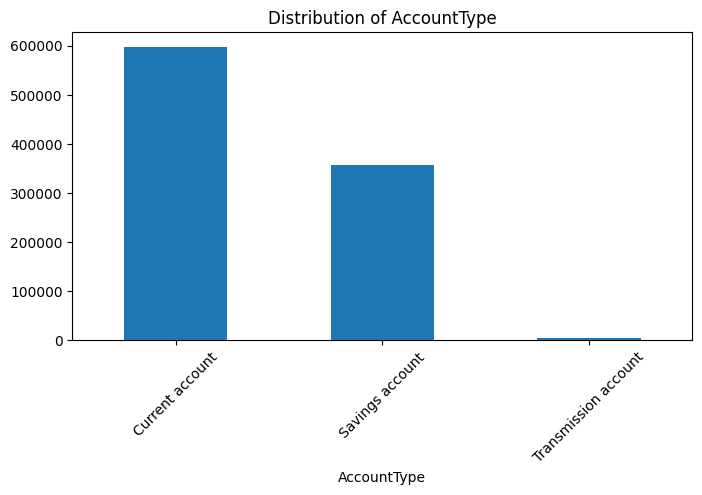

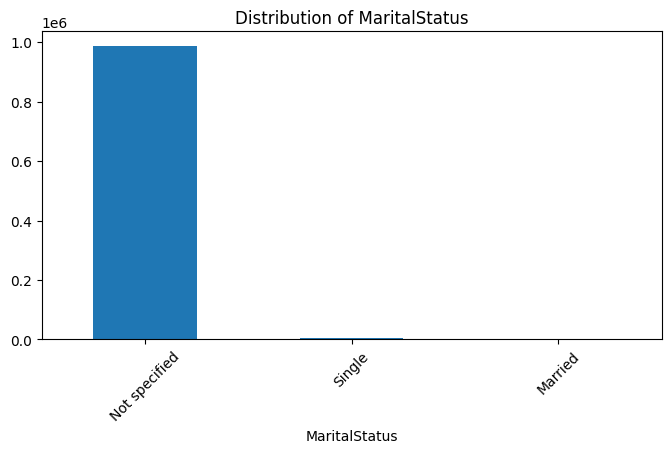

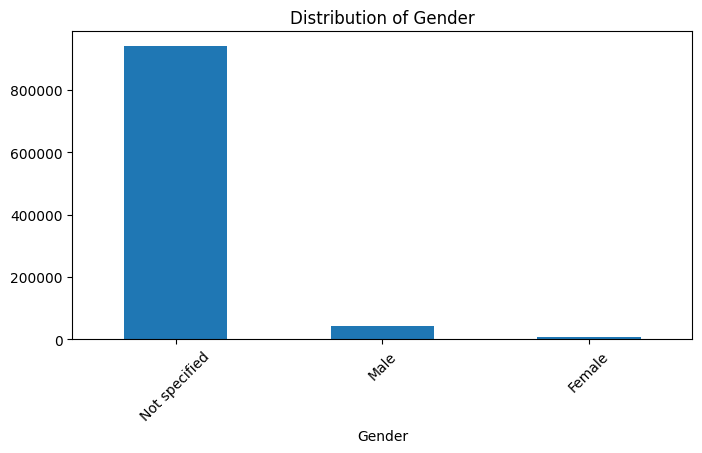

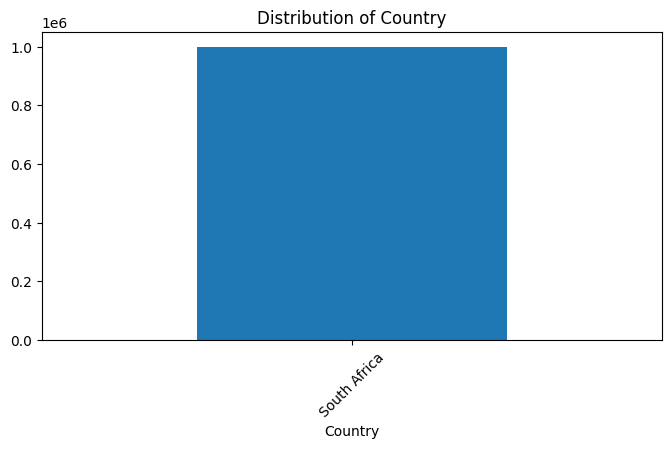

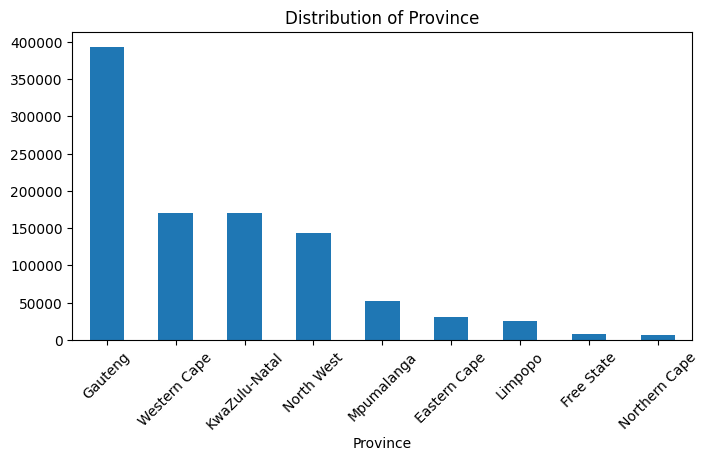

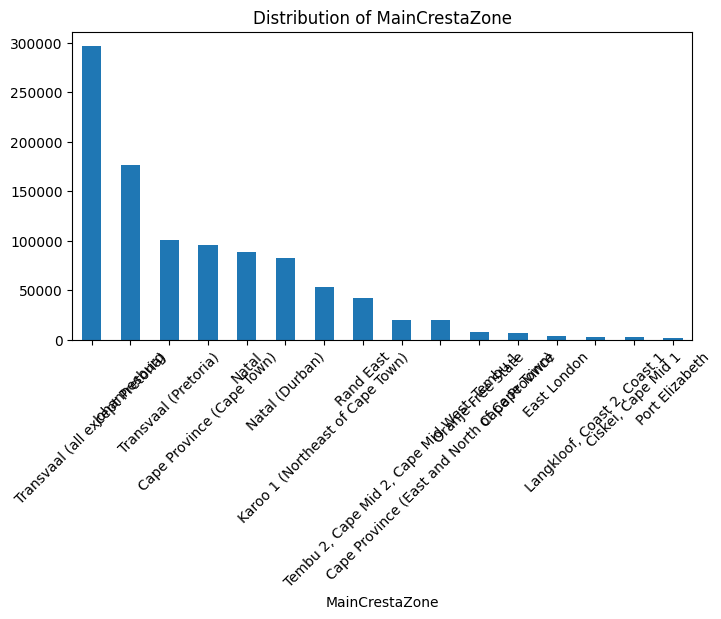

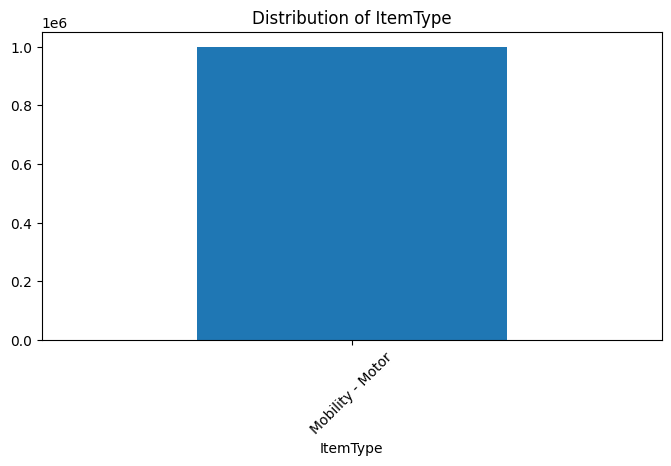

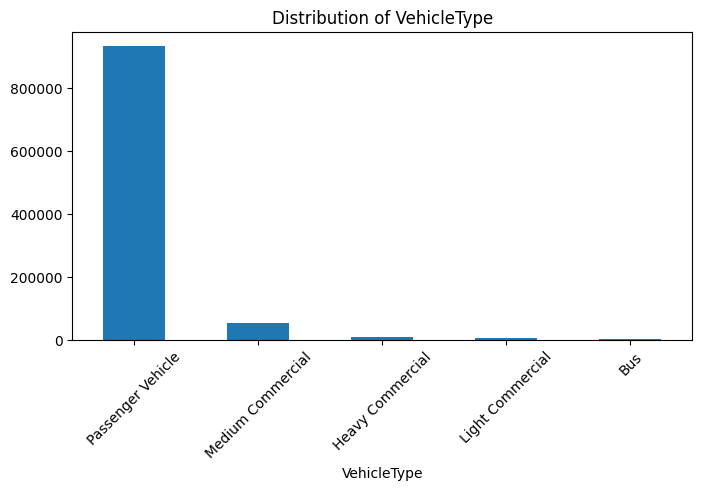

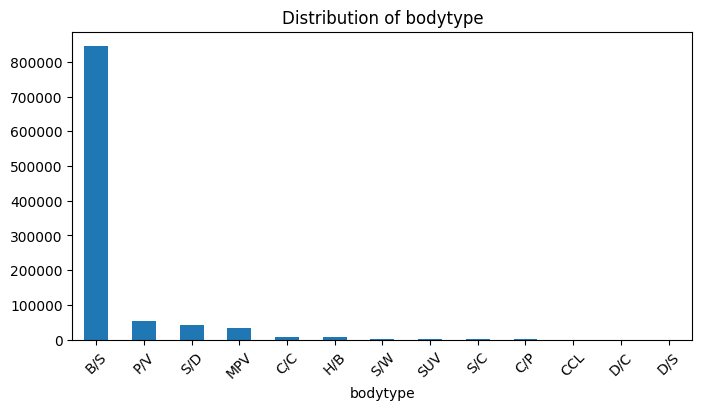

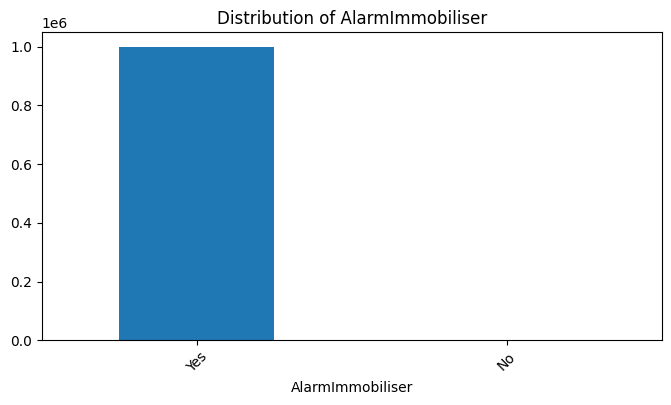

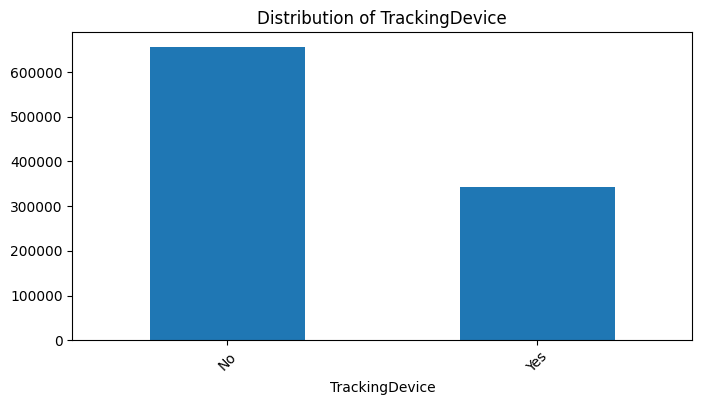

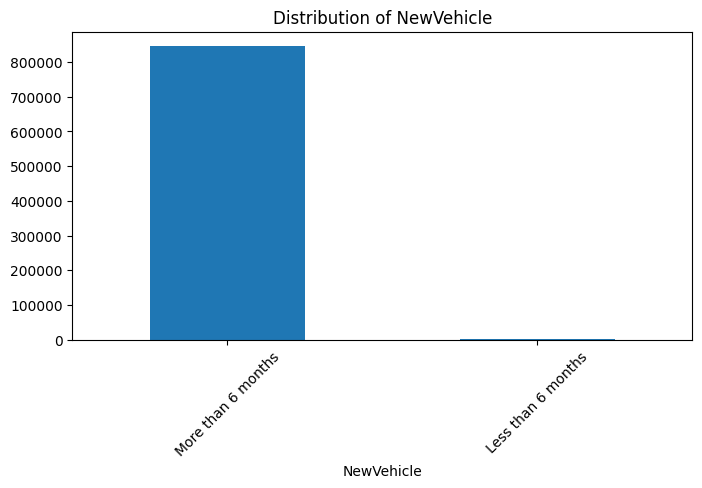

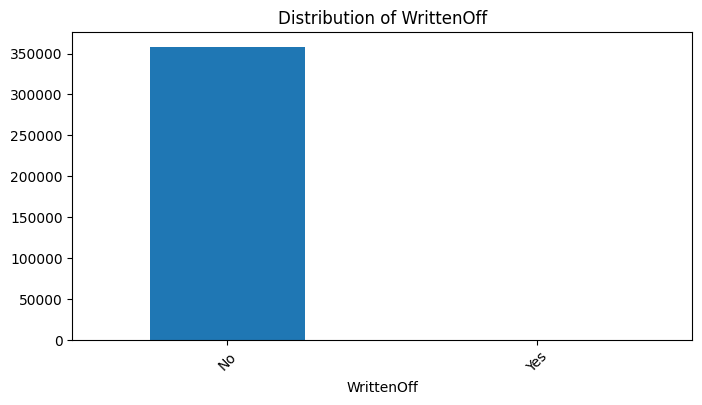

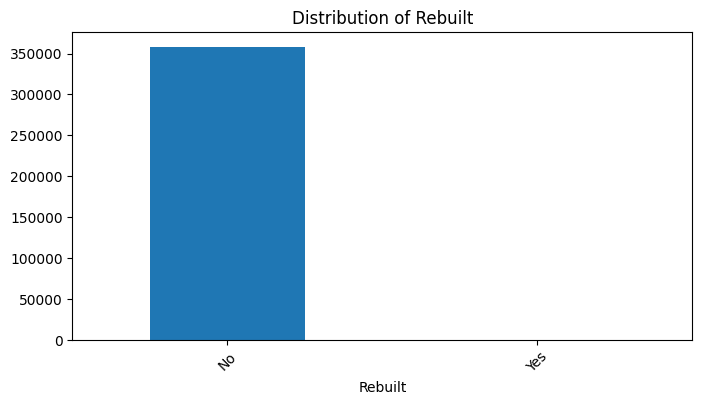

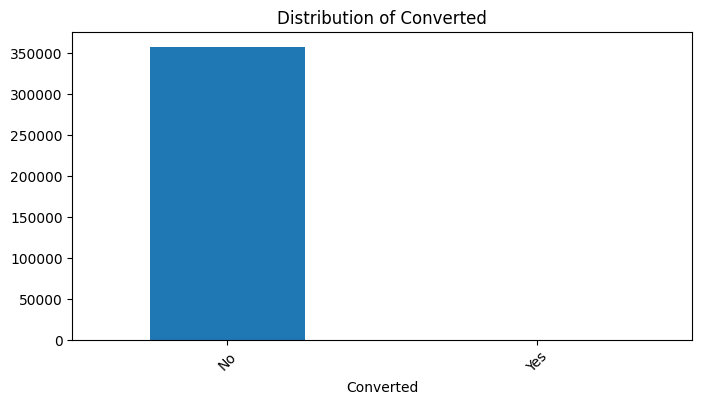

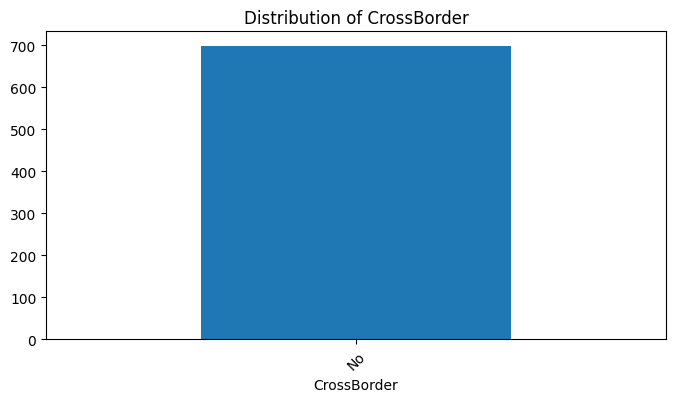

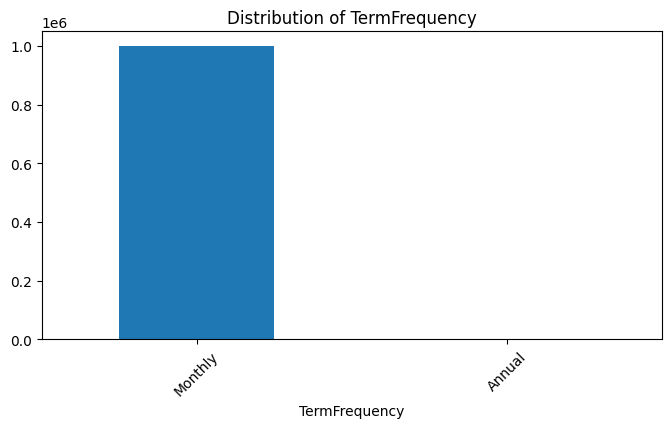

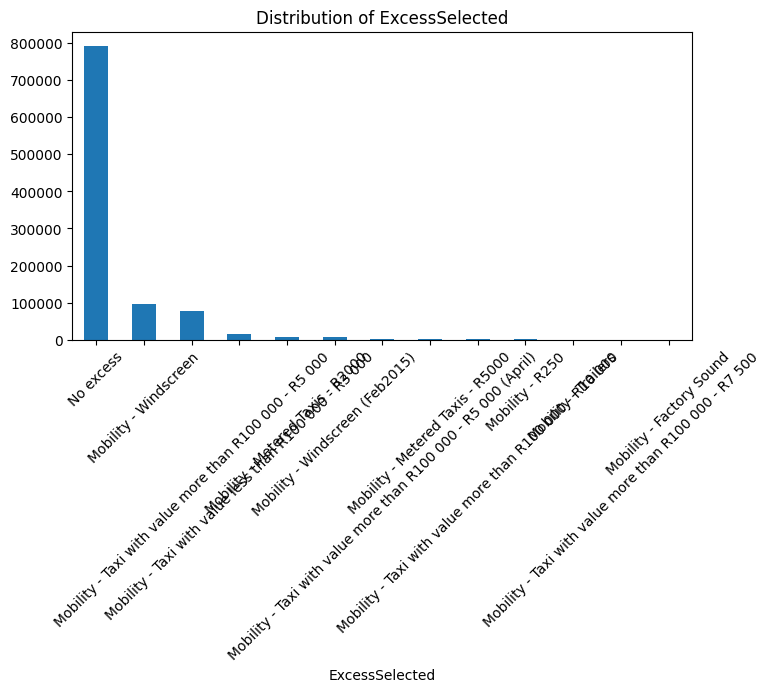

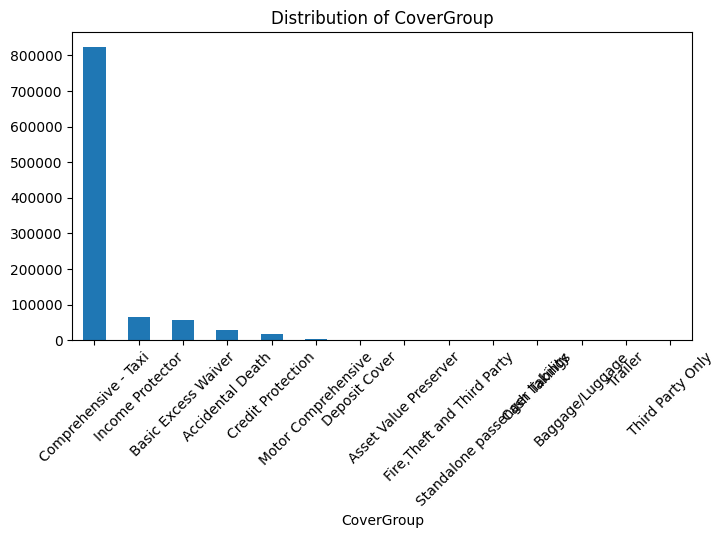

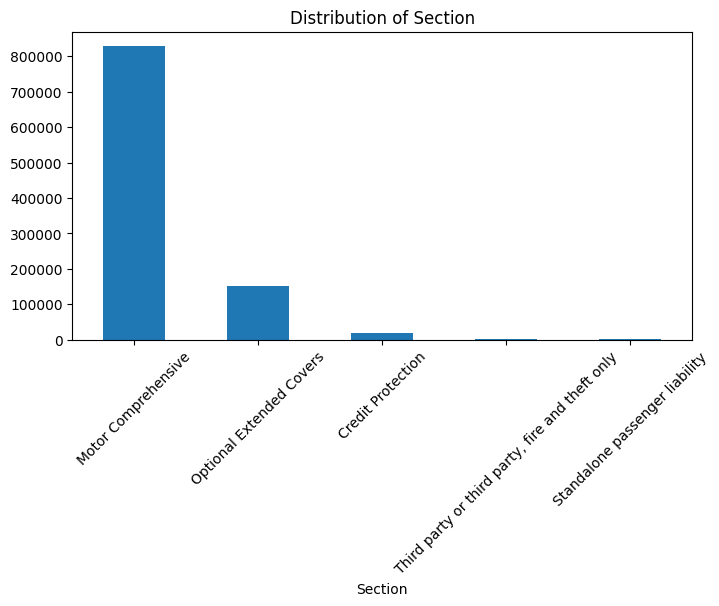

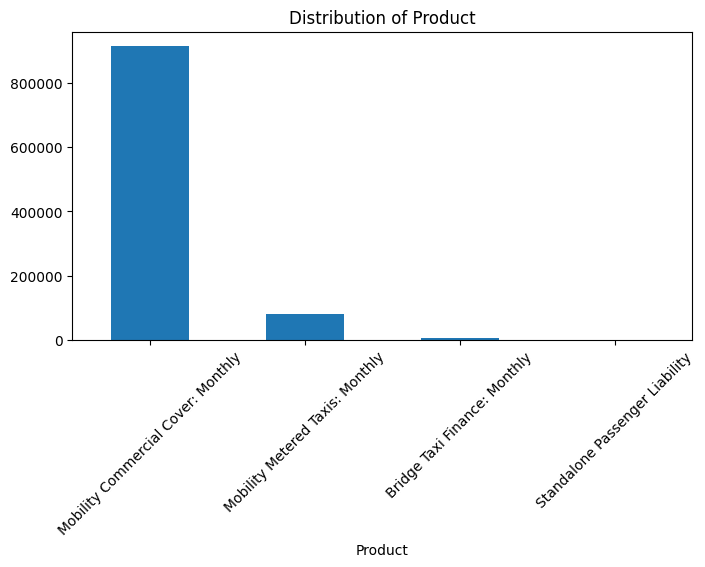

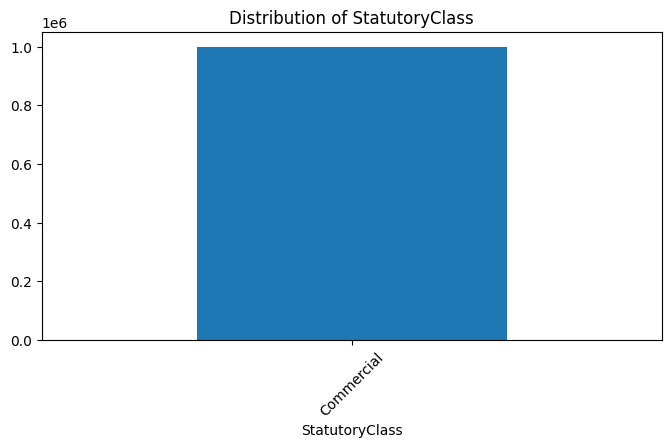

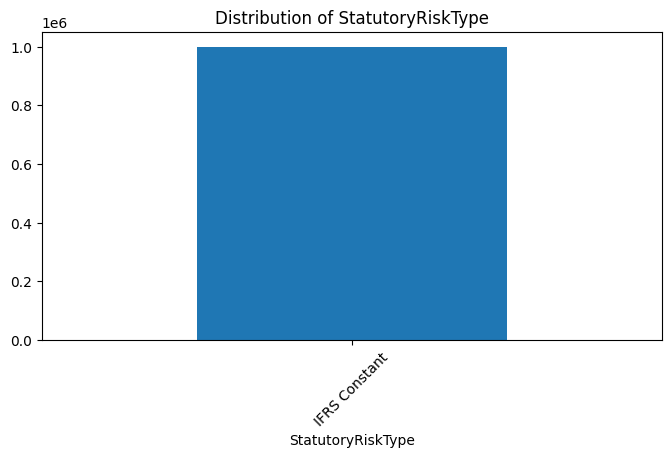

In [7]:
# Plot bar charts for categorical columns
for col in categorical_cols:
    if df[col].nunique() < 20:  # Avoid columns with too many unique values
        plt.figure(figsize=(8, 4))
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        plt.show()

# 4. Bivariate/Multivariate Analysis


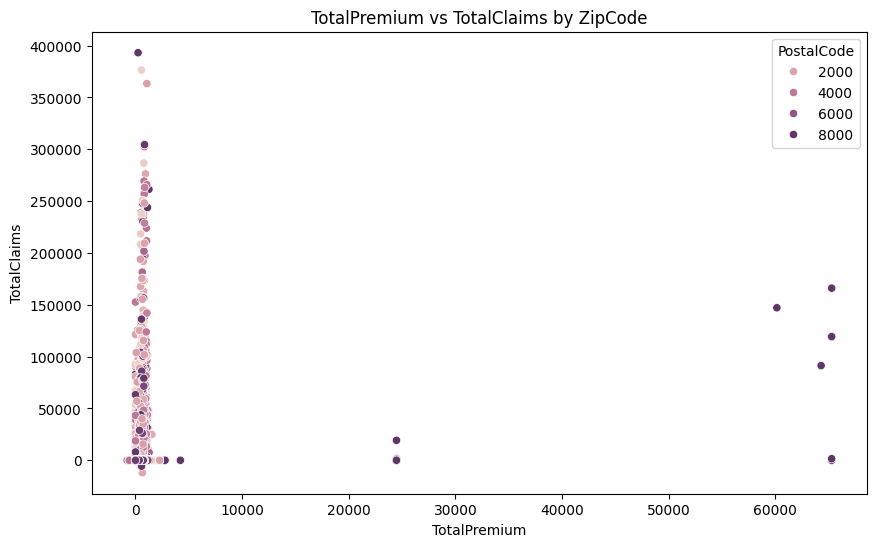

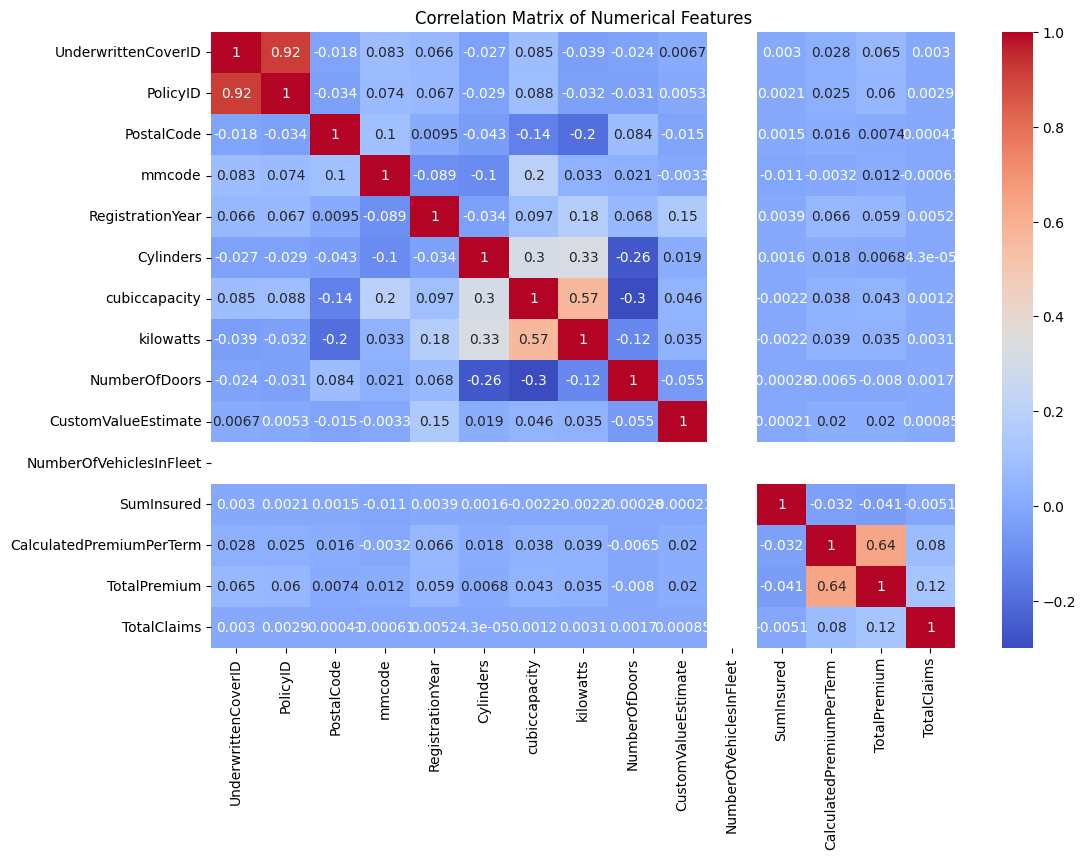

In [12]:
# Scatter plot of TotalPremium vs TotalClaims by ZipCode
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TotalPremium', y='TotalClaims', hue='PostalCode')
plt.title('TotalPremium vs TotalClaims by ZipCode')
plt.show()

# Correlation matrix
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# 5. Data Comparison


In [16]:
# Compare metrics by geography
geo_comparison = df.groupby('PostalCode').agg({
    'TotalPremium': 'mean',
    'TotalClaims': 'sum',
    'make': lambda x: x.mode()[0],
    'CoverType': lambda x: x.mode()[0]
})
print("\nGeographic Comparison:")
print(geo_comparison)


Geographic Comparison:
            TotalPremium    TotalClaims                                 make  \
PostalCode                                                                     
1              51.120638  307583.342105                               TOYOTA   
2              40.901700   61885.298246                               TOYOTA   
4             113.947737       0.000000                               TOYOTA   
5              61.653626   82951.526316                               TOYOTA   
6              50.591432    8628.596491                                  CMC   
...                  ...            ...                                  ...   
9781           54.553324   89698.245614                               TOYOTA   
9830          131.760895       0.000000  NISSAN/DATSUN                         
9868          116.042377       0.000000                               TOYOTA   
9869           44.774438    2236.842105                               TOYOTA   
9870           8

# 6. Outlier Detection


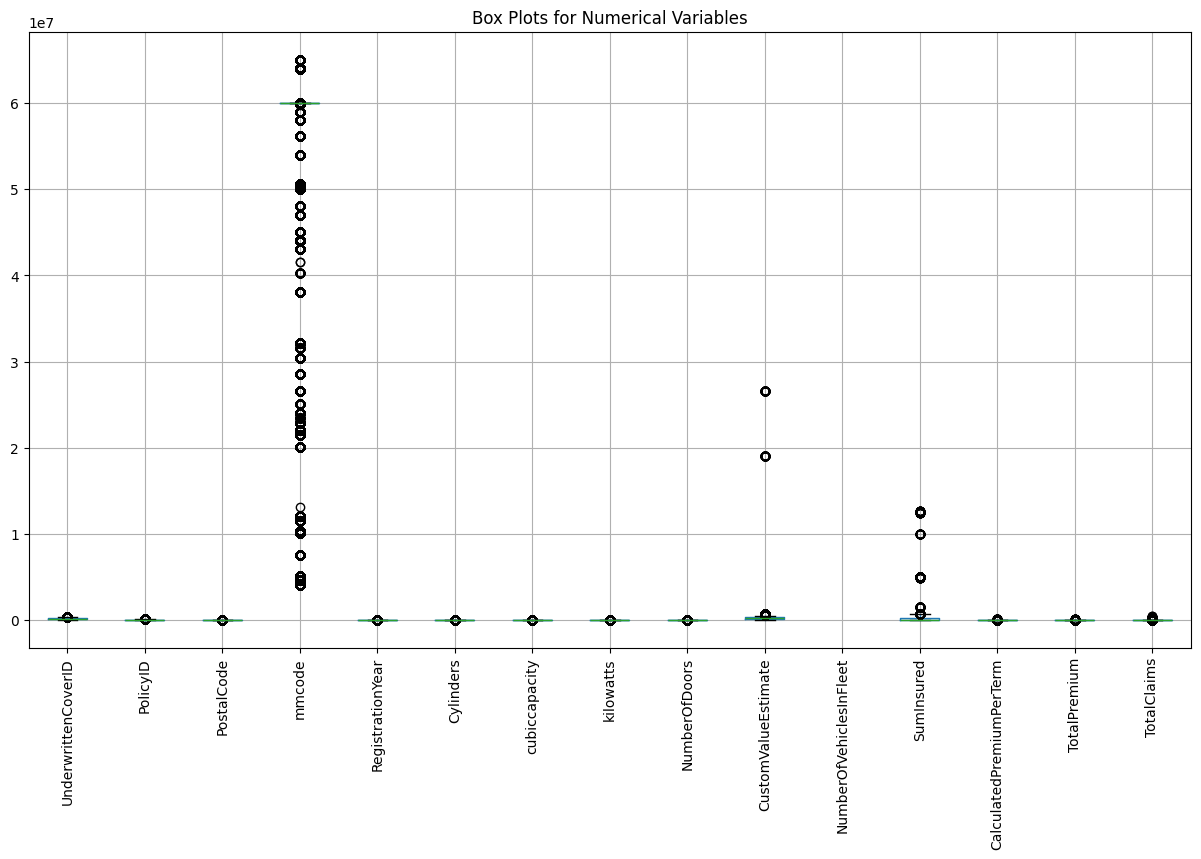

In [17]:
# Box plots for numerical columns to detect outliers
plt.figure(figsize=(15, 8))
df[numerical_cols].boxplot()
plt.title('Box Plots for Numerical Variables')
plt.xticks(rotation=90)
plt.show()

# 7. Creative Visualizations


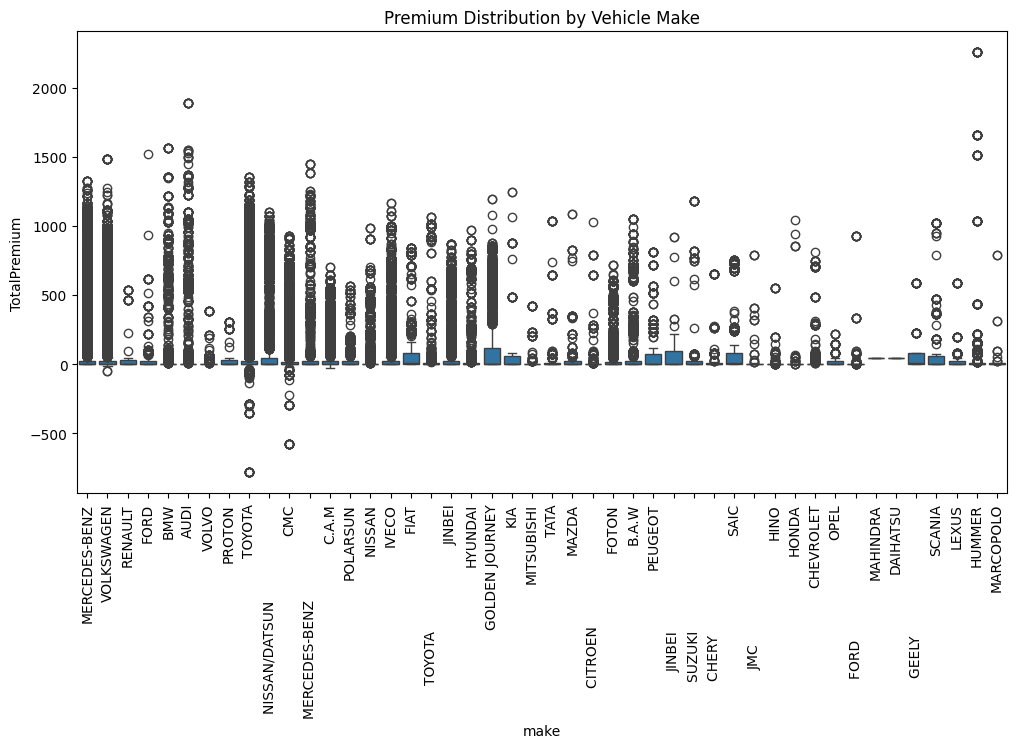

In [18]:
# Visualization 1: Premium Distribution by Vehicle Make

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='make', y='TotalPremium')
plt.title('Premium Distribution by Vehicle Make')
plt.xticks(rotation=90)
plt.show()

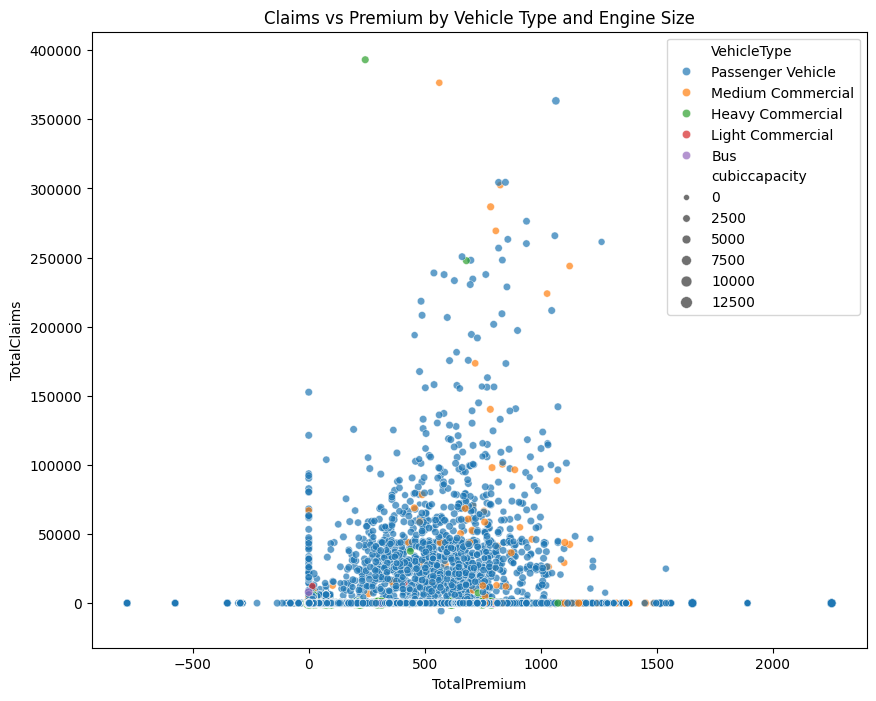

In [19]:
# Visualization 2: Claims vs Premium Bubble Chart

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='TotalPremium', y='TotalClaims', 
                size='cubiccapacity', hue='VehicleType', alpha=0.7)
plt.title('Claims vs Premium by Vehicle Type and Engine Size')
plt.show()

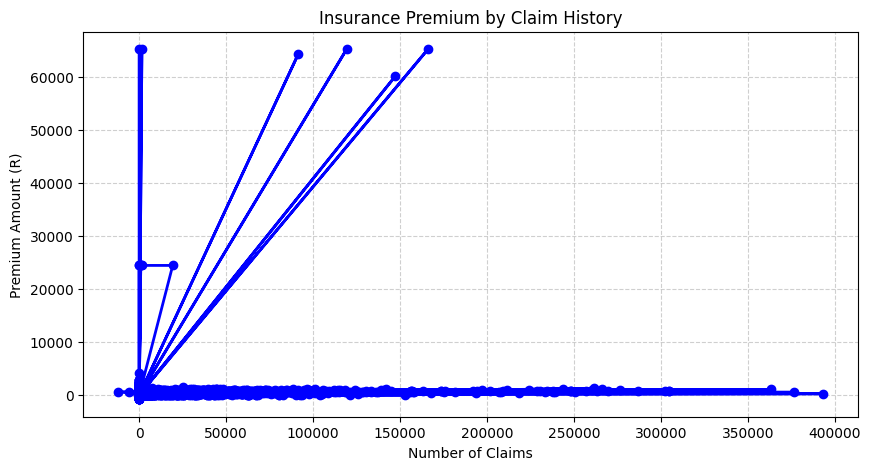

In [ ]:
# Visualization 3: Premium Distribution by Claim


plt.figure(figsize=(10, 5))

# Simple line plot
plt.plot(df['TotalClaims'], df['TotalPremium'], 
         marker='o', color='blue', linewidth=2)

# Basic labels
plt.title('Insurance Premium by Claim History')
plt.xlabel('Number of Claims')
plt.ylabel('Premium Amount (R)')

# Grid lines
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()